Populating the interactive namespace from numpy and matplotlib
(37L, 4L)
['A', 'B', 'C', 'D']


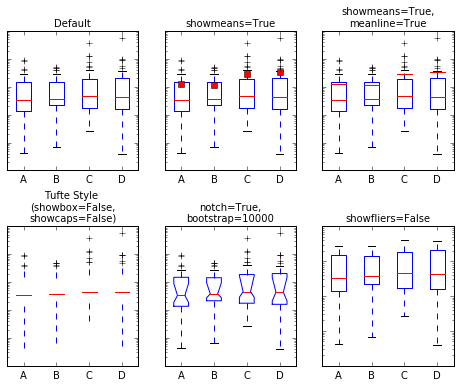

In [1]:
## boxplot

%pylab inline
"""
Demo of the new boxplot functionality
"""

import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

print data.shape
print labels


# demonstrate how to toggle the display of different elements:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
axes[1, 0].set_title('Tufte Style \n(showbox=False,\nshowcaps=False)', fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


{'boxes': [<matplotlib.lines.Line2D at 0x8741978>],
 'caps': [<matplotlib.lines.Line2D at 0x87526d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x8760780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8760208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8741b38>,
  <matplotlib.lines.Line2D at 0x8752160>]}

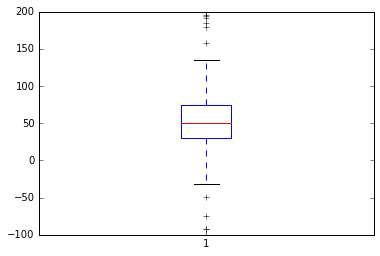

In [14]:
import numpy as np

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)

# basic plot
plt.boxplot(data)


{'boxes': [<matplotlib.lines.Line2D at 0x71b2710>],
 'caps': [<matplotlib.lines.Line2D at 0x9309a20>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9050908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x71b2898>,
  <matplotlib.lines.Line2D at 0x9309cf8>]}

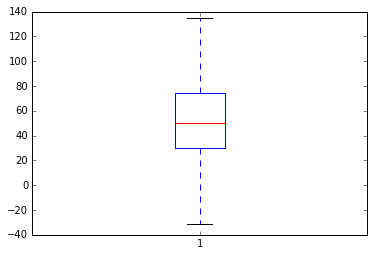

In [15]:

# don't show outlier points
plt.figure()
plt.boxplot(data, 0, '')



{'boxes': [<matplotlib.lines.Line2D at 0x9128908>],
 'caps': [<matplotlib.lines.Line2D at 0x94e5438>,
 'fliers': [<matplotlib.lines.Line2D at 0x9126780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9126eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9128c88>,
  <matplotlib.lines.Line2D at 0x94e5e10>]}

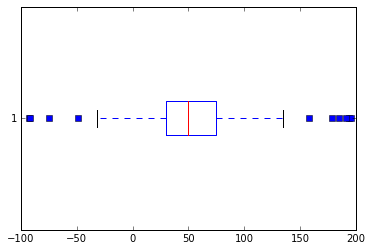

In [16]:
# horizontal boxes
plt.figure()
plt.boxplot(data, 0, 'rs', 0)


{'boxes': [<matplotlib.lines.Line2D at 0x78e2278>],
 'caps': [<matplotlib.lines.Line2D at 0x78dca90>,
 'fliers': [<matplotlib.lines.Line2D at 0xaa63128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x78dccc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x78e2438>,
  <matplotlib.lines.Line2D at 0x78e28d0>]}

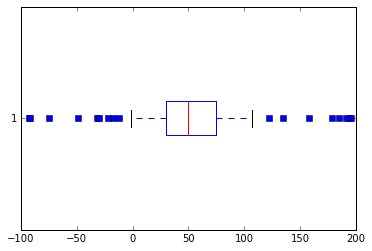

In [17]:

# change whisker length
plt.figure()
plt.boxplot(data, 0, 'rs', 0, 0.75)


In [24]:

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100

print spread.shape, center.shape, flier_high.shape ,flier_low.shape

d2 = np.concatenate((spread, center, flier_high, flier_low), 0)
print d2.shape

data.shape = (-1, 1)
print data.shape

d2.shape = (-1, 1)
print d2.shape

(50L,) (25L,) (10L,) (10L,)
(95L,)
(95L, 1L)
(95L, 1L)


<type 'list'>


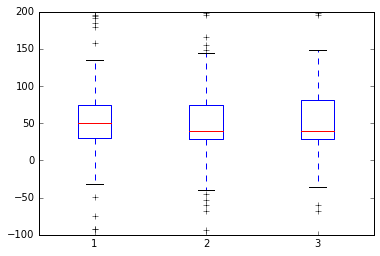

In [25]:
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]
print type(data)
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)

plt.show()

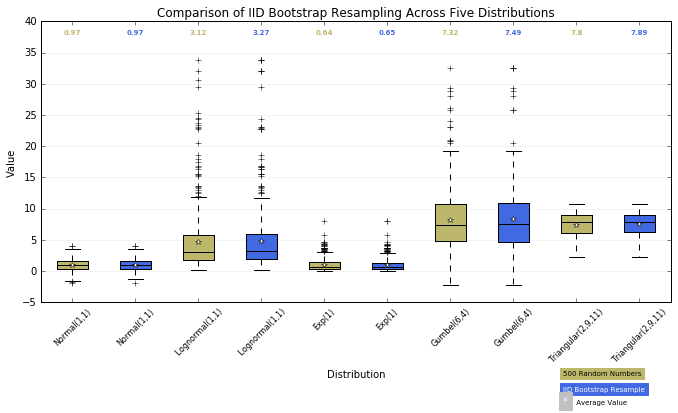

In [26]:
"""
Thanks Josh Hemann for the example
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


# Generate some data from five different probability distributions,
# each with different characteristics. We want to play with how an IID
# bootstrap resample of the data preserves the distributional
# properties of the original sample, and a boxplot is one visual tool
# to make this assessment
numDists = 5
randomDists = ['Normal(1,1)', ' Lognormal(1,1)', 'Exp(1)', 'Gumbel(6,4)',
               'Triangular(2,9,11)']
N = 500
norm = np.random.normal(1, 1, N)
logn = np.random.lognormal(1, 1, N)
expo = np.random.exponential(1, N)
gumb = np.random.gumbel(6, 4, N)
tria = np.random.triangular(2, 9, 11, N)

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array
bootstrapIndices = np.random.random_integers(0, N - 1, N)
normBoot = norm[bootstrapIndices]
expoBoot = expo[bootstrapIndices]
gumbBoot = gumb[bootstrapIndices]
lognBoot = logn[bootstrapIndices]
triaBoot = tria[bootstrapIndices]

data = [norm, normBoot, logn, lognBoot, expo, expoBoot, gumb, gumbBoot,
        tria, triaBoot]

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
boxColors = ['darkkhaki', 'royalblue']
numBoxes = numDists*2
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, numBoxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=np.repeat(randomDists, 2))
plt.setp(xtickNames, rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='x-small', weight=weights[k],
             color=boxColors[k])

# Finally, add a basic legend
plt.figtext(0.80, 0.08, str(N) + ' Random Numbers',
            backgroundcolor=boxColors[0], color='black', weight='roman',
            size='x-small')
plt.figtext(0.80, 0.045, 'IID Bootstrap Resample',
            backgroundcolor=boxColors[1],
            color='white', weight='roman', size='x-small')
plt.figtext(0.80, 0.015, '*', color='white', backgroundcolor='silver',
            weight='roman', size='medium')
plt.figtext(0.815, 0.013, ' Average Value', color='black', weight='roman',
            size='x-small')

plt.show()

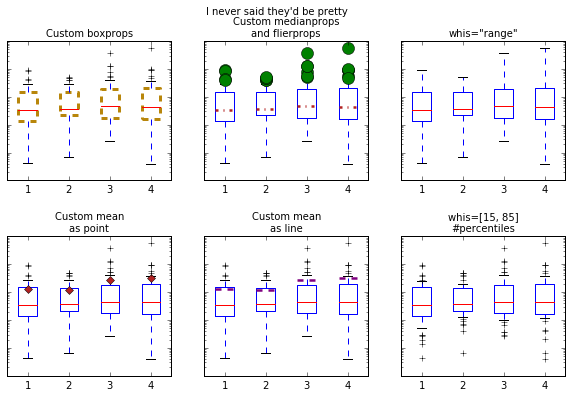

In [2]:
# demonstrate how to customize the display different elements:
boxprops = {'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'}
flierprops = {'marker':'o', 'markerfacecolor':'green', 'markersize':12, 'linestyle':'none'}
medianprops = {'linestyle':'-.', 'linewidth':2.5, 'color':'firebrick'}
meanpointprops = {'marker':'D', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
meanlineprops = {'linestyle':'--', 'linewidth':2.5, 'color':'purple'}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True, showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7bad588>],
 'caps': [<matplotlib.lines.Line2D at 0x8cefac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x792a550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8cd72e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8cf9780>,
  <matplotlib.lines.Line2D at 0x8cf9710>]}

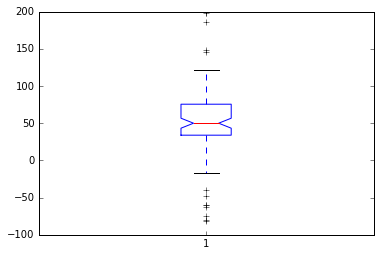

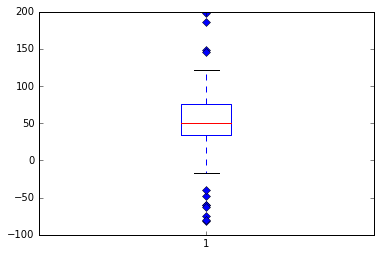

In [8]:

# notched plot
plt.figure()
plt.boxplot(data, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(data, 0, 'gD')


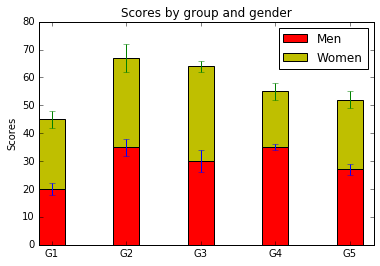

In [3]:
## stacked bar

#!/usr/bin/env python
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


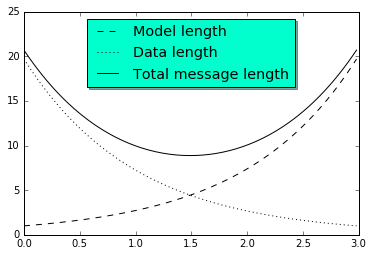

In [4]:
## legend

import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
plt.plot(a, c, 'k--', label='Model length')
plt.plot(a, d, 'k:', label='Data length')
plt.plot(a, c + d, 'k', label='Total message length')

legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()


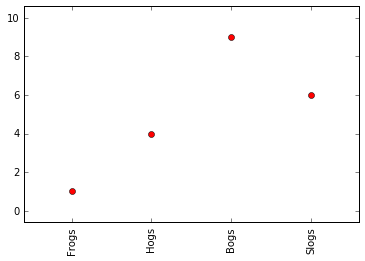

In [5]:
## tick labels

"""
Demo of custom tick-labels with user-defined rotation.
"""
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [1, 4, 9, 6]
labels = ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.plot(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()
